# Notebook to:
- Visualize graphs
- See the Q table

In [1]:
# library imports
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm
from pprint import pprint
import pandas as pd
# local imports
from environment import TreasureCube
from agents.RandomAgent import RandomAgent
from agents.QLearningAgent import QLearningAgent

In [2]:
def showPlot(X, Y, xlabel, ylabel):
    plt.plot(X, Y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [3]:
def test_cube(max_episode, max_step):
    env = TreasureCube(max_step=max_step)
    agent = QLearningAgent()
    episode_rewards = []
    for epsisode_num in tqdm(range(0, max_episode)):
        state = env.reset()
        terminate = False
        t = 0
        episode_reward = 0
        while not terminate:
            action = agent.take_action(state)
            # print(action)
            reward, terminate, next_state = env.step(action)
            episode_reward += reward
            t += 1
            agent.train(state, action, next_state, reward)
            state = next_state
        # print(
        #     f'episode: {epsisode_num}, total_steps: {t} episode reward: {episode_reward}')
        episode_rewards.append(episode_reward)
    # plot =  showPlot(list(range(max_episode)), episode_rewards,
    #                 'episode', 'episode rewards')
    qTable = agent.getQTable()
    return episode_rewards, qTable


In [4]:
max_episode = 500
max_step = 500  
episode_rewards, qTable = test_cube(max_episode, max_step)

100%|██████████| 500/500 [00:00<00:00, 732.36it/s]


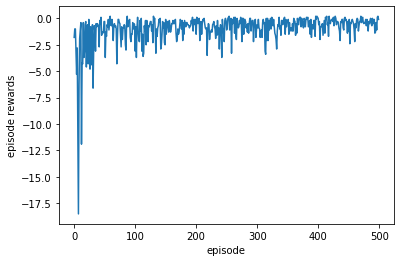

In [5]:
showPlot(range(max_episode), episode_rewards, xlabel='episode', ylabel= 'episode rewards')

In [6]:
# display entire Q table
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(qTable)

,right,left,forward,backward,up,down
000,-0.620174,-0.639193,-0.400533,-0.772852,-0.770284,-0.776056
001,-0.325145,-0.626932,-0.628484,-0.641641,-0.619198,-0.641907
002,-0.469215,-0.489492,-0.445575,-0.492155,-0.318215,-0.521475
003,-0.172182,-0.344794,-0.359677,-0.346274,-0.344794,-0.398444
010,-0.261859,-0.615715,-0.414461,-0.553177,-0.506292,-0.552995
011,-0.177125,-0.518453,-0.475913,-0.452806,-0.460041,-0.510741
012,-0.042299,-0.316064,-0.334096,-0.356742,-0.373915,-0.365238
013,0.057701,-0.292580,-0.266296,-0.203484,-0.232134,-0.219245
020,-0.111193,-0.489936,-0.423505,-0.415461,-0.421343,-0.465962
021,-0.005008,-0.326810,-0.355041,-0.347279,-0.325017,-0.351872
